In [1]:
import torch
import torch.nn as nn

In [ ]:
l = 100
d = 5
mu1 = torch.zeros(l, d)
sigma1 = torch.eye(d, d).repeat(l, 1, 1)
mu = torch.randn(l, d)
A = torch.tril(torch.randn(l, d, d))
# make diagonal positive
diag = torch.diagonal(A, dim1=-2, dim2=-1)        
diag = nn.Softplus()(diag)
# set diag of A to diag
A = A - torch.diag_embed(torch.diagonal(A, dim1=-2, dim2=-1)) + torch.diag_embed(diag)

In [ ]:
p = torch.distributions.MultivariateNormal(mu1, scale_tril=sigma1)
q = torch.distributions.MultivariateNormal(mu, scale_tril=A)
# compute the kl divergence
kl_loss = torch.distributions.kl_divergence(q, p).sum()
print(kl_loss)

In [ ]:
cov = torch.bmm(A, torch.transpose(A, 1, 2))
det = torch.det(cov)
kl_loss = 0.5 * torch.sum(torch.sum(mu.pow(2), dim=1) + torch.einsum("...ii", cov) - mu.shape[1] - torch.log(det))
print(kl_loss, 'original')

In [ ]:
batch, dim, time = 10, 5, 100
bd = torch.randn(batch, time, 2*dim)
prec = torch.zeros(batch, dim, time, time)
for i in range(dim):
    diag_elems = bd[:, :, i]
    off_diag_elems = bd[:, :-1, i+dim]
    # fill elements
    prec[:, i, :, :] = torch.diag_embed(diag_elems) + torch.diag_embed(off_diag_elems, offset=1, dim1=-2, dim2=-1)
    prec[:, i, :, :] = torch.bmm(prec[:, i, :, :].transpose(1, 2), prec[:, i, :, :])
    print(prec[0, i, :, :])

In [2]:
from vae_unimodal import TimeSeries

In [9]:
a = TimeSeries(10, 8, 2, 25, False, 1, False, 0.1)

In [10]:
y = torch.randn(5, 25, 10)

In [17]:
out = a.forward(y)
out[0].sample_n(10).shape

/Users/mithileshvaidya/miniforge3/lib/python3.10/site-packages/torch/distributions/distribution.py:167: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


torch.Size([10, 5, 25])

In [9]:
# create matrix with 1 on diagonala and off diagonal
a = torch.eye(5, 5)
# put 1 on off diagonal
a += torch.diag_embed(torch.ones(4), 1)
# print(a.T @ a)
print(torch.linalg.inv(a.T @ a))

tensor([[ 5., -4.,  3., -2.,  1.],
        [-4.,  4., -3.,  2., -1.],
        [ 3., -3.,  3., -2.,  1.],
        [-2.,  2., -2.,  2., -1.],
        [ 1., -1.,  1., -1.,  1.]])


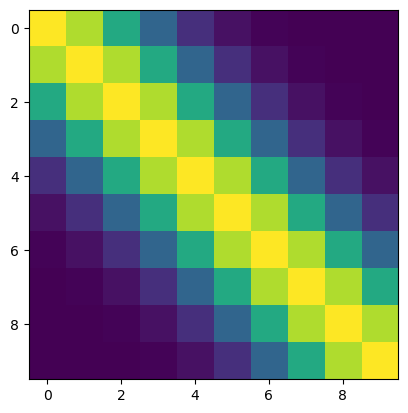

In [10]:
from vae_unimodal import rbf_kernel
import matplotlib.pyplot as plt
plt.imshow(rbf_kernel(10, 2))